In [31]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import tensorflow as tf

In [32]:
model = tf.keras.models.load_model('../models/my_model/checkpoints')
model

In [33]:
for d, a,b  in os.walk('../test_data'):
    files = filter(lambda f: f.endswith('g'), b) # jpg
    filenames = np.array(list(files))
    paths = np.array([os.path.join(d, f) for f in filenames])
    labels = np.array([f[0] for f in filenames])
labels = pd.Series(labels)
labels.values

array(['K', 'B', 'V', 'A', 'L', 'P', 'X', 'N', 'B', 'B', 'Z', 'S', 'H',
       'G', 'A', 'O', 'C', 'E', 'F', 'A', 'Q', 'M', 'U', 'W', 'J', 'A',
       'B', 'D', 'T', 'I', 'R', 'Y'], dtype=object)

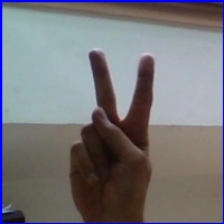

In [34]:
from IPython.display import Image 
imgs = [tf.keras.preprocessing.image.load_img(
    path, grayscale=False, color_mode='rgb', target_size=(224, 224),
    interpolation='bilinear'
) for path in paths]
display(imgs[0])

In [35]:
imarrs = np.array([tf.keras.preprocessing.image.img_to_array(img) for img in imgs])
imarrs.shape

(32, 224, 224, 3)

(array([610244., 446845., 416188., 480026., 644812., 551012., 847838.,
        685569.,  82774.,  51588.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ], dtype=float32),
 <a list of 10 Patch objects>)

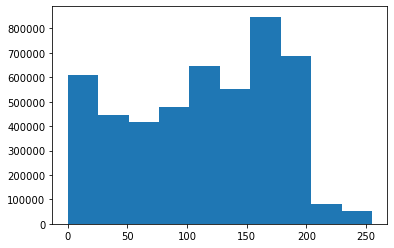

In [36]:
plt.hist(imarrs.flatten())

In [37]:
x = tf.convert_to_tensor(imarrs)
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
x.shape

TensorShape([32, 224, 224, 3])

(array([610244., 446845., 416188., 480026., 644812., 551012., 847838.,
        685569.,  82774.,  51588.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

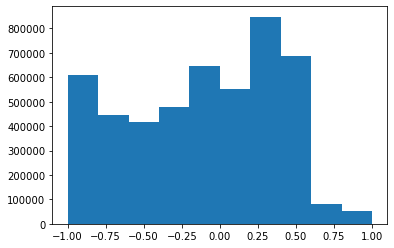

In [38]:
plt.hist(x.numpy().flatten())

A random batch

In [39]:
x1 = tf.random.uniform((32, 224, 224, 3))
model.predict(x1)[0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.4331487e-24,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

Input images

In [40]:
predictions = model.predict(x)
predictions[0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.4327294e-24,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [41]:
np.sum(predictions[0])

1.0

In [42]:
intlabels_p = np.argmax(predictions, axis=1)
intlabels_p

array([13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13])

In [43]:
intlabels, class_names = pd.factorize(labels.sort_values())
intlabels

array([ 0,  0,  0,  0,  1,  1,  1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])

In [44]:
sum(intlabels_p == intlabels), 'out of', len(x)

(1, 'out of', 32)